In [1]:
from modules import socrata_tools as st
import matplotlib as plt
import pandas as pd

%matplotlib inline

__APP_TOKEN = '1UDvLapXXQY4bBsuwS1Xr7A1K'

In [2]:
dataset_id = 'hd8k-y28e'
df = st.get_pandas_from_dataset_id(dataset_id, st.__get_socrata_client(__APP_TOKEN))

In [3]:
df['data'] = pd.to_datetime(df['data'], errors='coerce') # TODO - There can be dates with bad format

df = df.rename(
    index=  str, 
    columns = {
        'alt_c_rrec':'nom_alt_carrec',
        'c_rrec': 'carrec',
        'grup_d_inter_s':'nom_grup_interes', 
        'inscripci_al_rgi':'estat_regisre_grup_interes',
        'n_mero_de_rgi': 'num_registre_grup_interes',
        'nom_registre_grup_inter_s': 'nom_registre_grup_interes',
        'tema': 'motiu_activitat',
        'unitat_org_nica': 'unitat_organica'
    }
)

df.head()

,activitat,nom_alt_carrec,carrec,data,departament,nom_grup_interes,id,estat_regisre_grup_interes,num_registre_grup_interes,nom_registre_grup_interes,motiu_activitat,unitat_organica
0,Acte,Pere Aragonès i Garcia,vicepresident del Govern i conseller d'Economi...,2018-11-09,Departament de la Vicepresidència i d'Economia...,"Industrias Electricas Soler, S.A",racc-2054-2925,Inscrit,2893,Registre de Grups d'Interès de Catalunya,Presidència i cloenda de l'acte amb motiu del ...,Departament de la Vicepresidència i d'Economia...
1,Acte,Chakir El Homrani Lesfar,"conseller de Treball, Afers Socials i Famílies",2018-11-08,"Departament de Treball, Afers Socials i Famílies",Unió Empresarial Intersectorial - Cercle d'Emp...,racc-2024-2858,Inscrit,836,Registre de Grups d'Interès de Catalunya,Sopar - tertúlia del cercle d'empresaris,"Departament de Treball, Afers Socials i Famílies"
2,Reunió,Jordi Puigneró i Ferrer,Secretari,2017-10-23,Departament de la Presidència,"Kpmg Asesores, S.L.",CMH308,Inscrit,451,Registre de Grups d'Interès de Catalunya,Presentació institucional,"Secretaria de Telecomunicacions, Cibersegureta..."
3,Acte,Chakir El Homrani Lesfar,"conseller de Treball, Afers Socials i Famílies",2018-11-09,"Departament de Treball, Afers Socials i Famílies",Associació Esclat,racc-2025-2859,Inscrit,1067,Registre de Grups d'Interès de Catalunya,Sopar solidari d' ESCLAT,"Departament de Treball, Afers Socials i Famílies"
4,Acte,Chakir El Homrani Lesfar,"conseller de Treball, Afers Socials i Famílies",2018-11-05,"Departament de Treball, Afers Socials i Famílies",Fundació Pere Tarrés,racc-2023-2857,Inscrit,167,Registre de Grups d'Interès de Catalunya,Acte de reconeixement dels 125 anys de Colòni...,"Departament de Treball, Afers Socials i Famílies"


In [4]:
df.shape[0]

8602

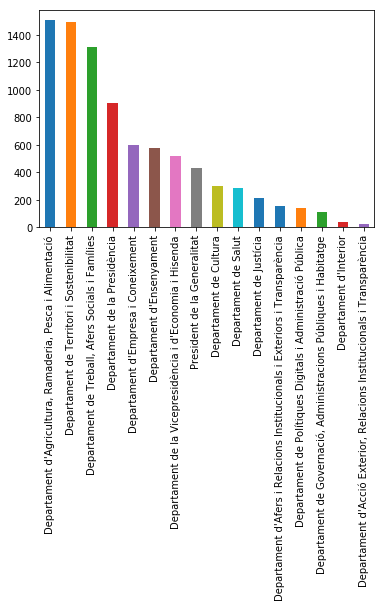

In [5]:
pd.value_counts(df['departament']).plot.bar()

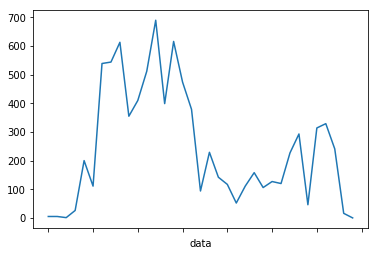

In [6]:
df.groupby(df['data'].dt.strftime('%Y-%m'))['data'].count().plot() #plot.bar() to plot bars

In [22]:
print ('num. trobades | Grup d\'interès')
for element in df[df['departament'] == 'Departament de Territori i Sostenibilitat']['carrec'].groupby(
    df['nom_grup_interes']).count().sort_values(ascending = False).items():
    print (element[1], '            ',element[0])

num. trobades | Grup d'interès
23              Unió de Pagesos de Catalunya
21              Iberpotash S.A.
17              Cat Desenvolupament de Concessions Catalanes, S. L.
14              Cedinsa Ter Concessionària de la Generalitat de Catalunya, SA
13              Reial Automòbil Club de Catalunya (RACC)
11              Endesa, S. A.
11              INSTITUT ILDEFONS CERDÀ Fundació Privada
10              Fundació per a l'Assessorament i Acció en Defensa dels Animals
10              Ecoembalajes España, S.A.
10              Abertis Autopistas España, S.A.
10              Cambra Oficial de Contractistes d'Obres de Catalunya
9              Vueling Airlines, S.A.
9              Confederació Empresarial de Transports Per Carretera de Catalunya (cetcat)
9              Col·legi d'Arquitectes de Catalunya
8              Ipcena
8              Associació per a la Promoció del Transport Públic
8              Moventia - Operadores de Transporte, SL
8              Unió General de Treballadors

In [7]:
for row in df[df['departament'] == 'Departament d\'Interior'][['data','nom_grup_interes','num_registre_grup_interes', 'motiu_activitat']].iterrows():
    print(row[1][0], '[NR-%s]:' % row[1][2], row[1][1], '-', row[1][3])

2018-11-12 00:00:00 [NR-1458]: Deloitte Advisory S.L - Propostes col·laboració
2018-11-08 00:00:00 [NR-590]: Col·legi Oficial de Gestors Administratius de Catalunya - Presentació de la Junta directiva i fotografia amb director del Servei Català de Trànsit per la revista del Col·legi
2018-11-13 00:00:00 [NR-737]: Abertis Autopistas España, S.A. - Dinar-reunió amb la directiva d'Abertis Autopistes per seguiment actuacions
2018-11-14 00:00:00 [NR-2725]: Fundació Mutual de Conductors - Presentació de la directiva de la Fundació al director de l'SCT
2018-07-06 00:00:00 [NR-1973]: Prevenció d'Accidents de Trànsit - Presentació del president, vicepresident i directora de l'associació P(A)T Prevenció d'Accidents de Trànsit
2018-07-11 00:00:00 [NR-1809]: Col·legi de Publicitàries i Publicitaris i Relacions Públiques de Catalunya - 5a. edició Premis Impacte. Guanyadora la campanya de l'SCT "Tots tenim família"
2018-07-10 00:00:00 [NR-2725]: Fundació Mutual de Conductors - Diada de Sant Cristòfol

In [8]:
df[df['departament'] == 'Departament d\'Interior']['carrec'].groupby(df['nom_grup_interes']).count()

nom_grup_interes
ACEDE                                                                                2
AGAMVCAT, Associació d'Agents, Guàrdies i Vigilants Municiaps de Catalunya           1
ANESDOR (Asociación Nacional de Empresas del Sector dos Ruedas)                      1
Abertis Autopistas España, S.A.                                                      3
Amnistia Internacional Catalunya                                                     1
Ataac-assemblea de Treballadors Assalariats d'Autoescoles de Catalunya               1
Col·legi Oficial de Gestors Administratius de Catalunya                              1
Col·legi de Publicitàries i Publicitaris i Relacions Públiques de Catalunya          1
Creu Roja a Catalunya                                                                1
DOXA                                                                                 1
Deloitte Advisory S.L                                                                1
Federacion Empresarial Cat

In [ ]:
d={}
for col in df:
    d[col] = df[col].unique()
d

In [ ]:
http://hemeroteca.lavanguardia.com/search.html?aux=pepinillo&fromISO=true&q=pepinillo&bd=01&bm=01&by=1881&ed=31&em=12&ey=2018

In [6]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/95/6e03c1e40776851eda7af2e9b014bcf510e3205033c33b604c2ee36687a1/kiwisolver-1.0.1-cp37-none-win32.whl
